In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
population = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_10576638.csv")
population.columns = ["Country", "pop2015", "pop2016", "pop2017"]
population.head()

,Country,pop2015,pop2016,pop2017
0,Aruba,104341.0,104822.0,105264.0
1,Afghanistan,33736494.0,34656032.0,35530081.0
2,Angola,27859305.0,28813463.0,29784193.0
3,Albania,2880703.0,2876101.0,2873457.0
4,Andorra,78014.0,77281.0,76965.0


In [3]:
gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10576830.csv")
gdp.columns = ["Country", "gdp2015", "gdp2016", "gdp2017"]
gdp.head()

,Country,gdp2015,gdp2016,gdp2017
0,Aruba,2.691620e+09,2.646927e+09,2.700559e+09
1,Afghanistan,1.990711e+10,1.904636e+10,1.954398e+10
2,Angola,1.161940e+11,1.011240e+11,1.221240e+11
3,Albania,1.138693e+10,1.188368e+10,1.303854e+10
4,Andorra,2.811489e+09,2.877312e+09,3.012914e+09


In [50]:
d2015 = pd.read_csv("2015.csv")
d2016 = pd.read_csv("2016.csv")
d2017 = pd.read_csv("2017.csv")

In [5]:
d2015 = d2015.loc[d2015.Country != "Taiwan"]
d2015 = d2015.loc[d2015.Country != "Hong Kong"]
d2016 = d2016.loc[d2016.Country != "Taiwan"]
d2016 = d2016.loc[d2016.Country != "Hong Kong"]
d2017 = d2017.loc[d2017.Country != "Taiwan Province of China"]
d2017 = d2017.loc[d2017.Country != "Hong Kong S.A.R., China"]

In [6]:
d2015 = d2015.merge(population[["Country","pop2015"]], on="Country", how="left")
d2015 = d2015.merge(gdp[["Country", "gdp2015"]], on="Country", how="left")
d2015 = d2015.dropna()

In [7]:
d2016 = d2016.merge(population[["Country","pop2016"]], on="Country", how="left")
d2016 = d2016.merge(gdp[["Country", "gdp2016"]], on="Country", how="left")
d2016 = d2016.dropna()

In [8]:
d2017 = d2017.merge(population[["Country","pop2017"]], on="Country", how="left")
d2017 = d2017.merge(gdp[["Country", "gdp2017"]], on="Country", how="left")
d2017 = d2017.dropna()

In [9]:
d2015.to_csv("data2015.csv")

In [10]:
d2016.to_csv("data2016.csv")

In [11]:
d2017.to_csv("data2017.csv")

In [12]:
d2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,pop2015,gdp2015
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8282396.0,6.798320e+11
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,330815.0,1.734417e+10
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5683483.0,3.026730e+11
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5188607.0,3.866630e+11
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,35832513.0,1.552520e+12


In [13]:
d2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'pop2015', 'gdp2015'],
      dtype='object')

In [45]:
data15 = d2015[['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity','pop2015', 'gdp2015']]

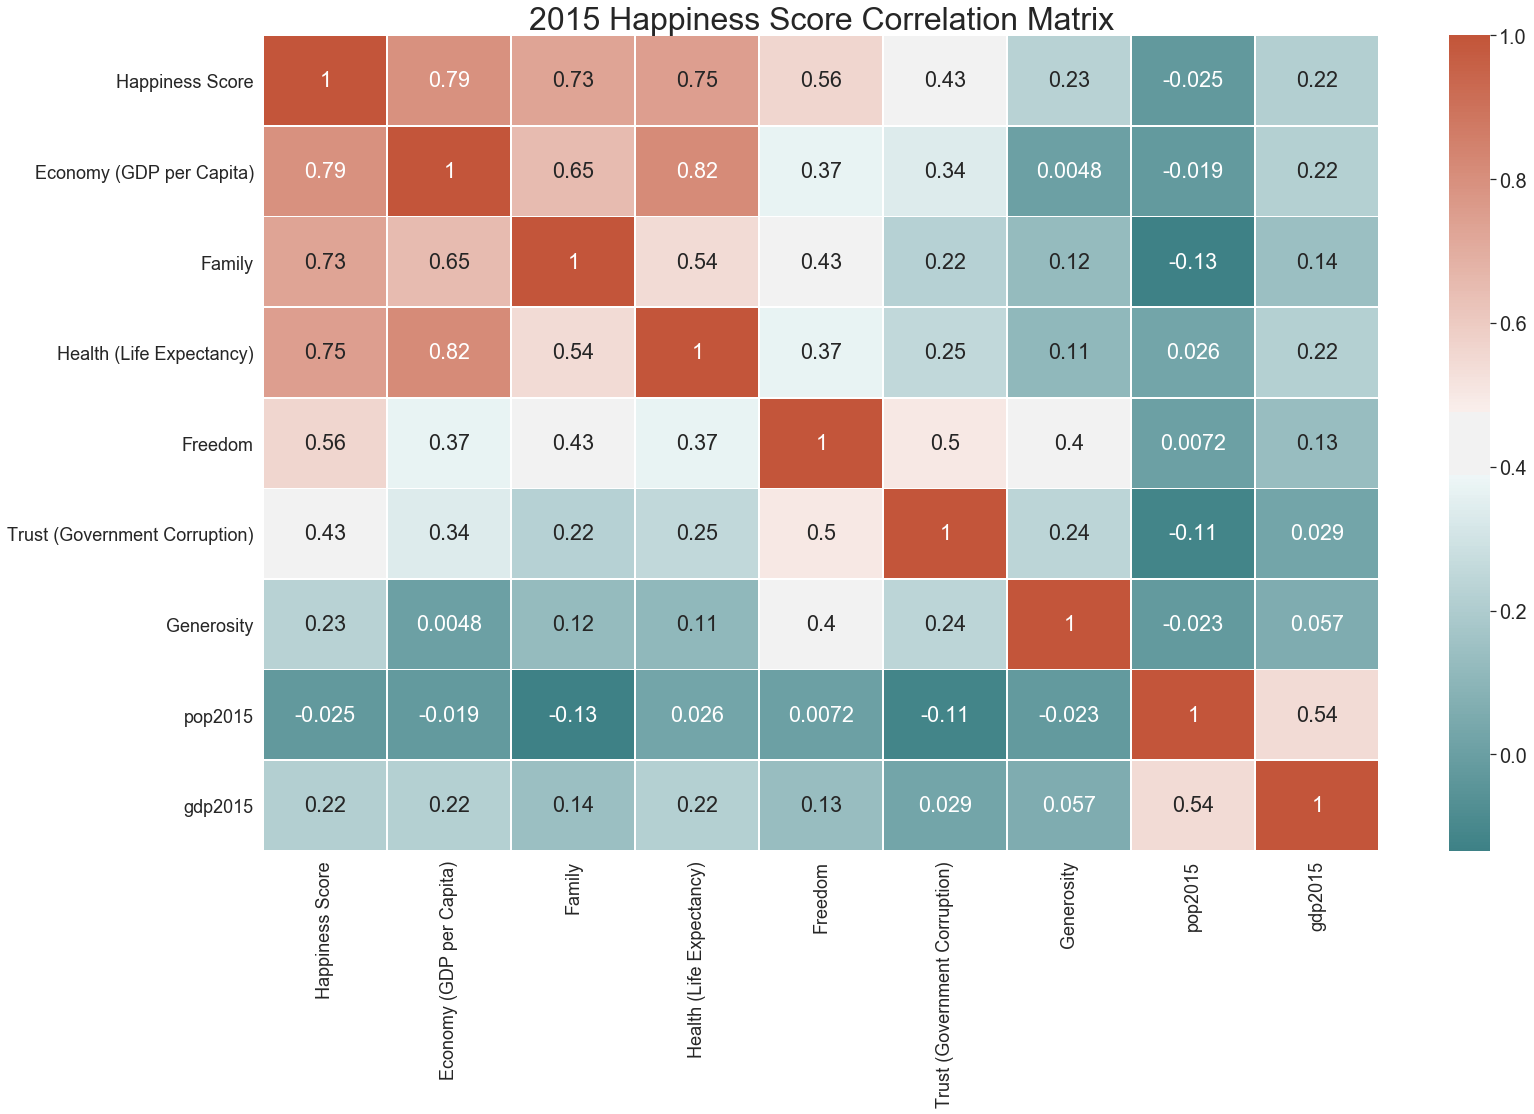

In [46]:
plt.figure(figsize=(25,15))

cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(data15.corr(),annot=True, linewidth=0.5, cmap=cmap)
sns.set(font_scale=1.8)
plt.title("2015 Happiness Score Correlation Matrix", fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



plt.savefig("heatmap2015.png")

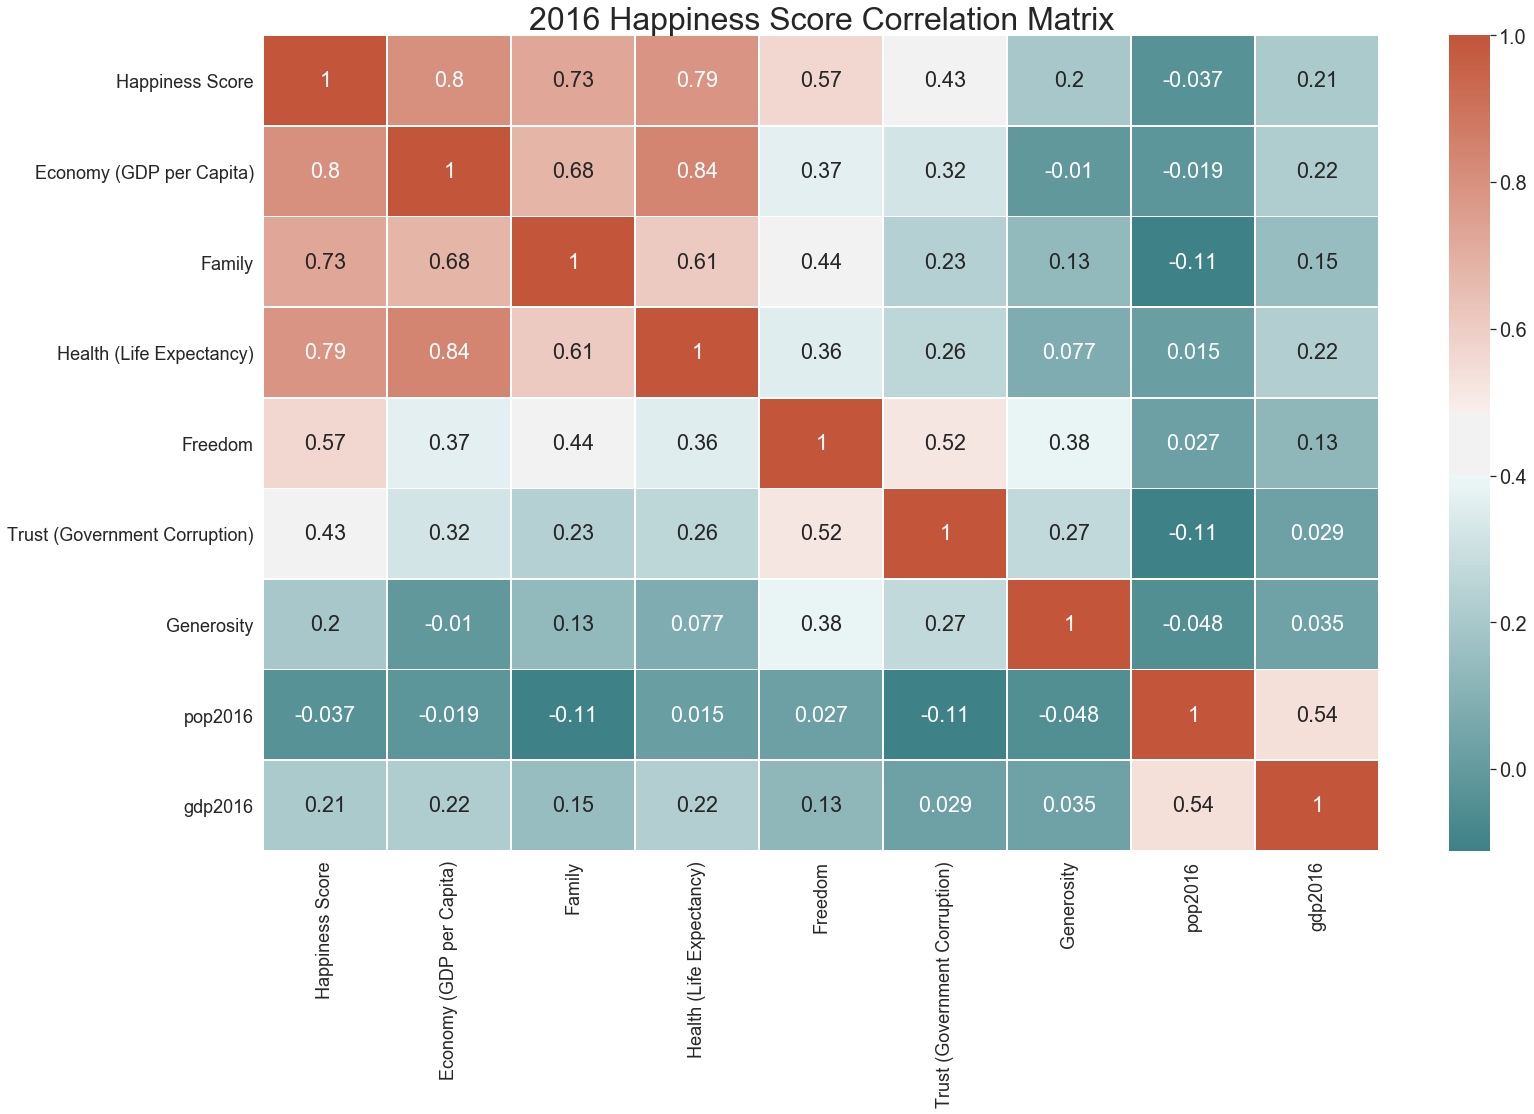

In [19]:
data16 = d2016[['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity','pop2016', 'gdp2016']]

plt.figure(figsize=(25,15))

cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(data16.corr(),annot=True, linewidth=0.5, cmap=cmap)
sns.set(font_scale=1.8)
plt.title("2016 Happiness Score Correlation Matrix", fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



plt.savefig("heatmap2016.png")

In [23]:
data17 = d2017[['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'pop2017', 'gdp2017']]


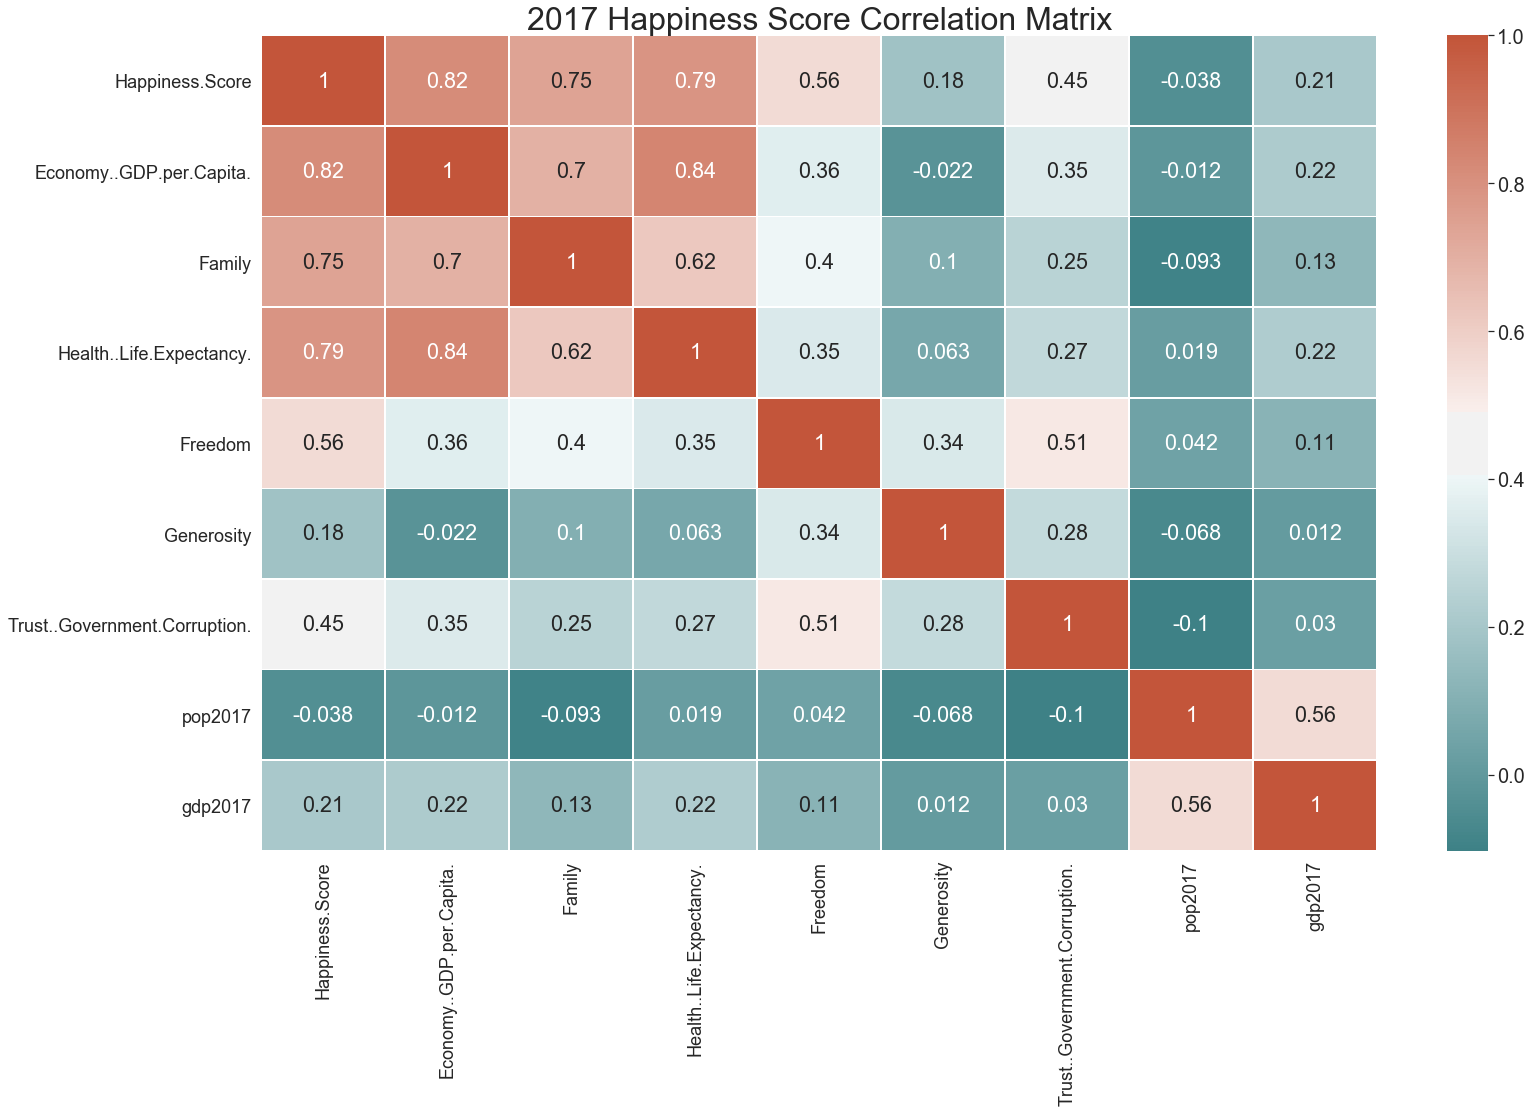

In [25]:
plt.figure(figsize=(25,15))

cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(data17.corr(),annot=True, linewidth=0.5, cmap=cmap)
sns.set(font_scale=1.8)
plt.title("2017 Happiness Score Correlation Matrix", fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig("heatmap2017.png")

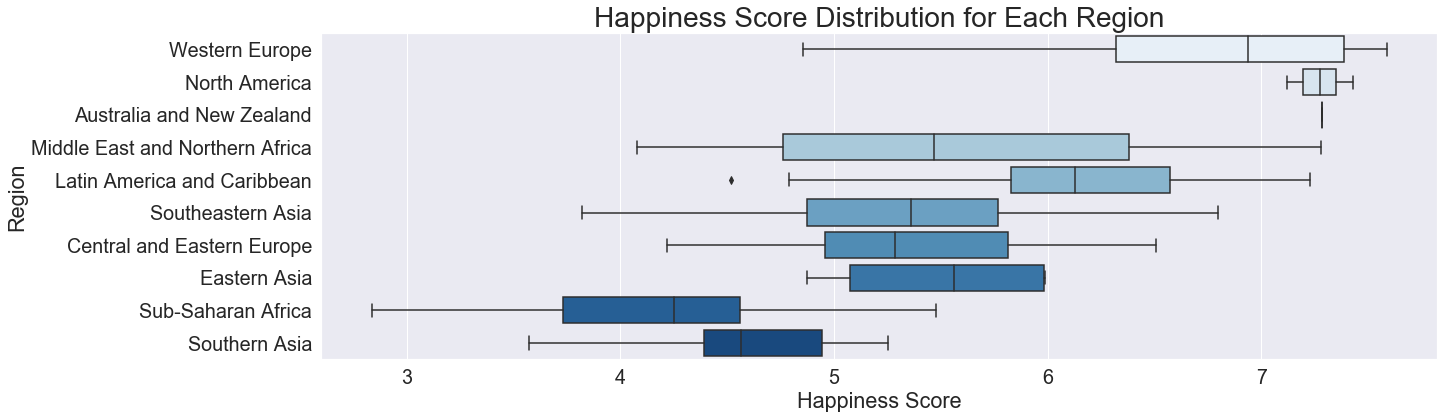

In [87]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x="Happiness Score", y="Region", data=d2015, palette="Blues")

plt.title("Happiness Score Distribution for Each Region", fontsize=28)
plt.savefig("boxplot.png")

Text(0.5, 1.0, 'Happiness Score Distribution')

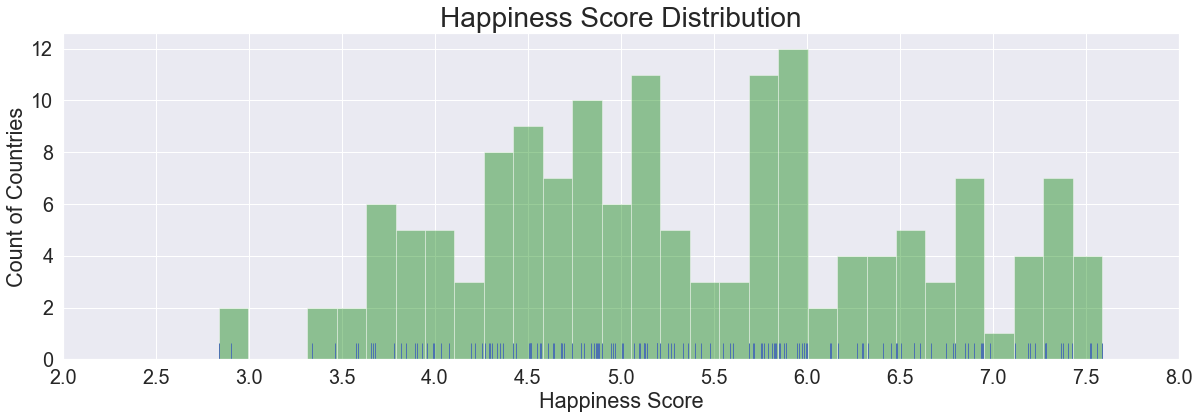

In [107]:
plt.figure(figsize=(20, 6))

sns.distplot(d2015["Happiness Score"], bins=30, rug=True, kde=False,
             hist_kws={'color':'green'},
             kde_kws={'color':'blue'},)
plt.xticks(np.arange(2, 8.5, 0.5))
plt.ylabel("Count of Countries")
plt.title("Happiness Score Distribution", fontsize=28)

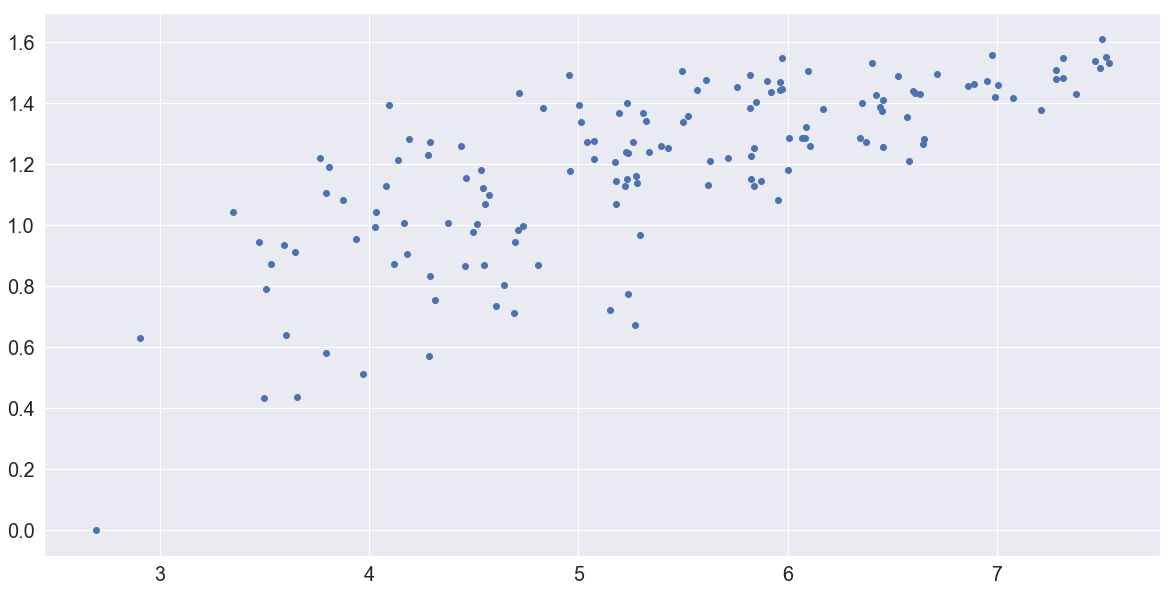

In [109]:
plt.figure(figsize=(20, 10))

plt.scatter(d2017["Happiness.Score"], d2017["Family"])

In [27]:
year = pd.read_csv("year.csv")

In [28]:
year.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'pop', 'gdp', 'year'],
      dtype='object')

In [29]:
year_data = year[['Happiness Rank', 
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'pop', 'gdp', 'year']]

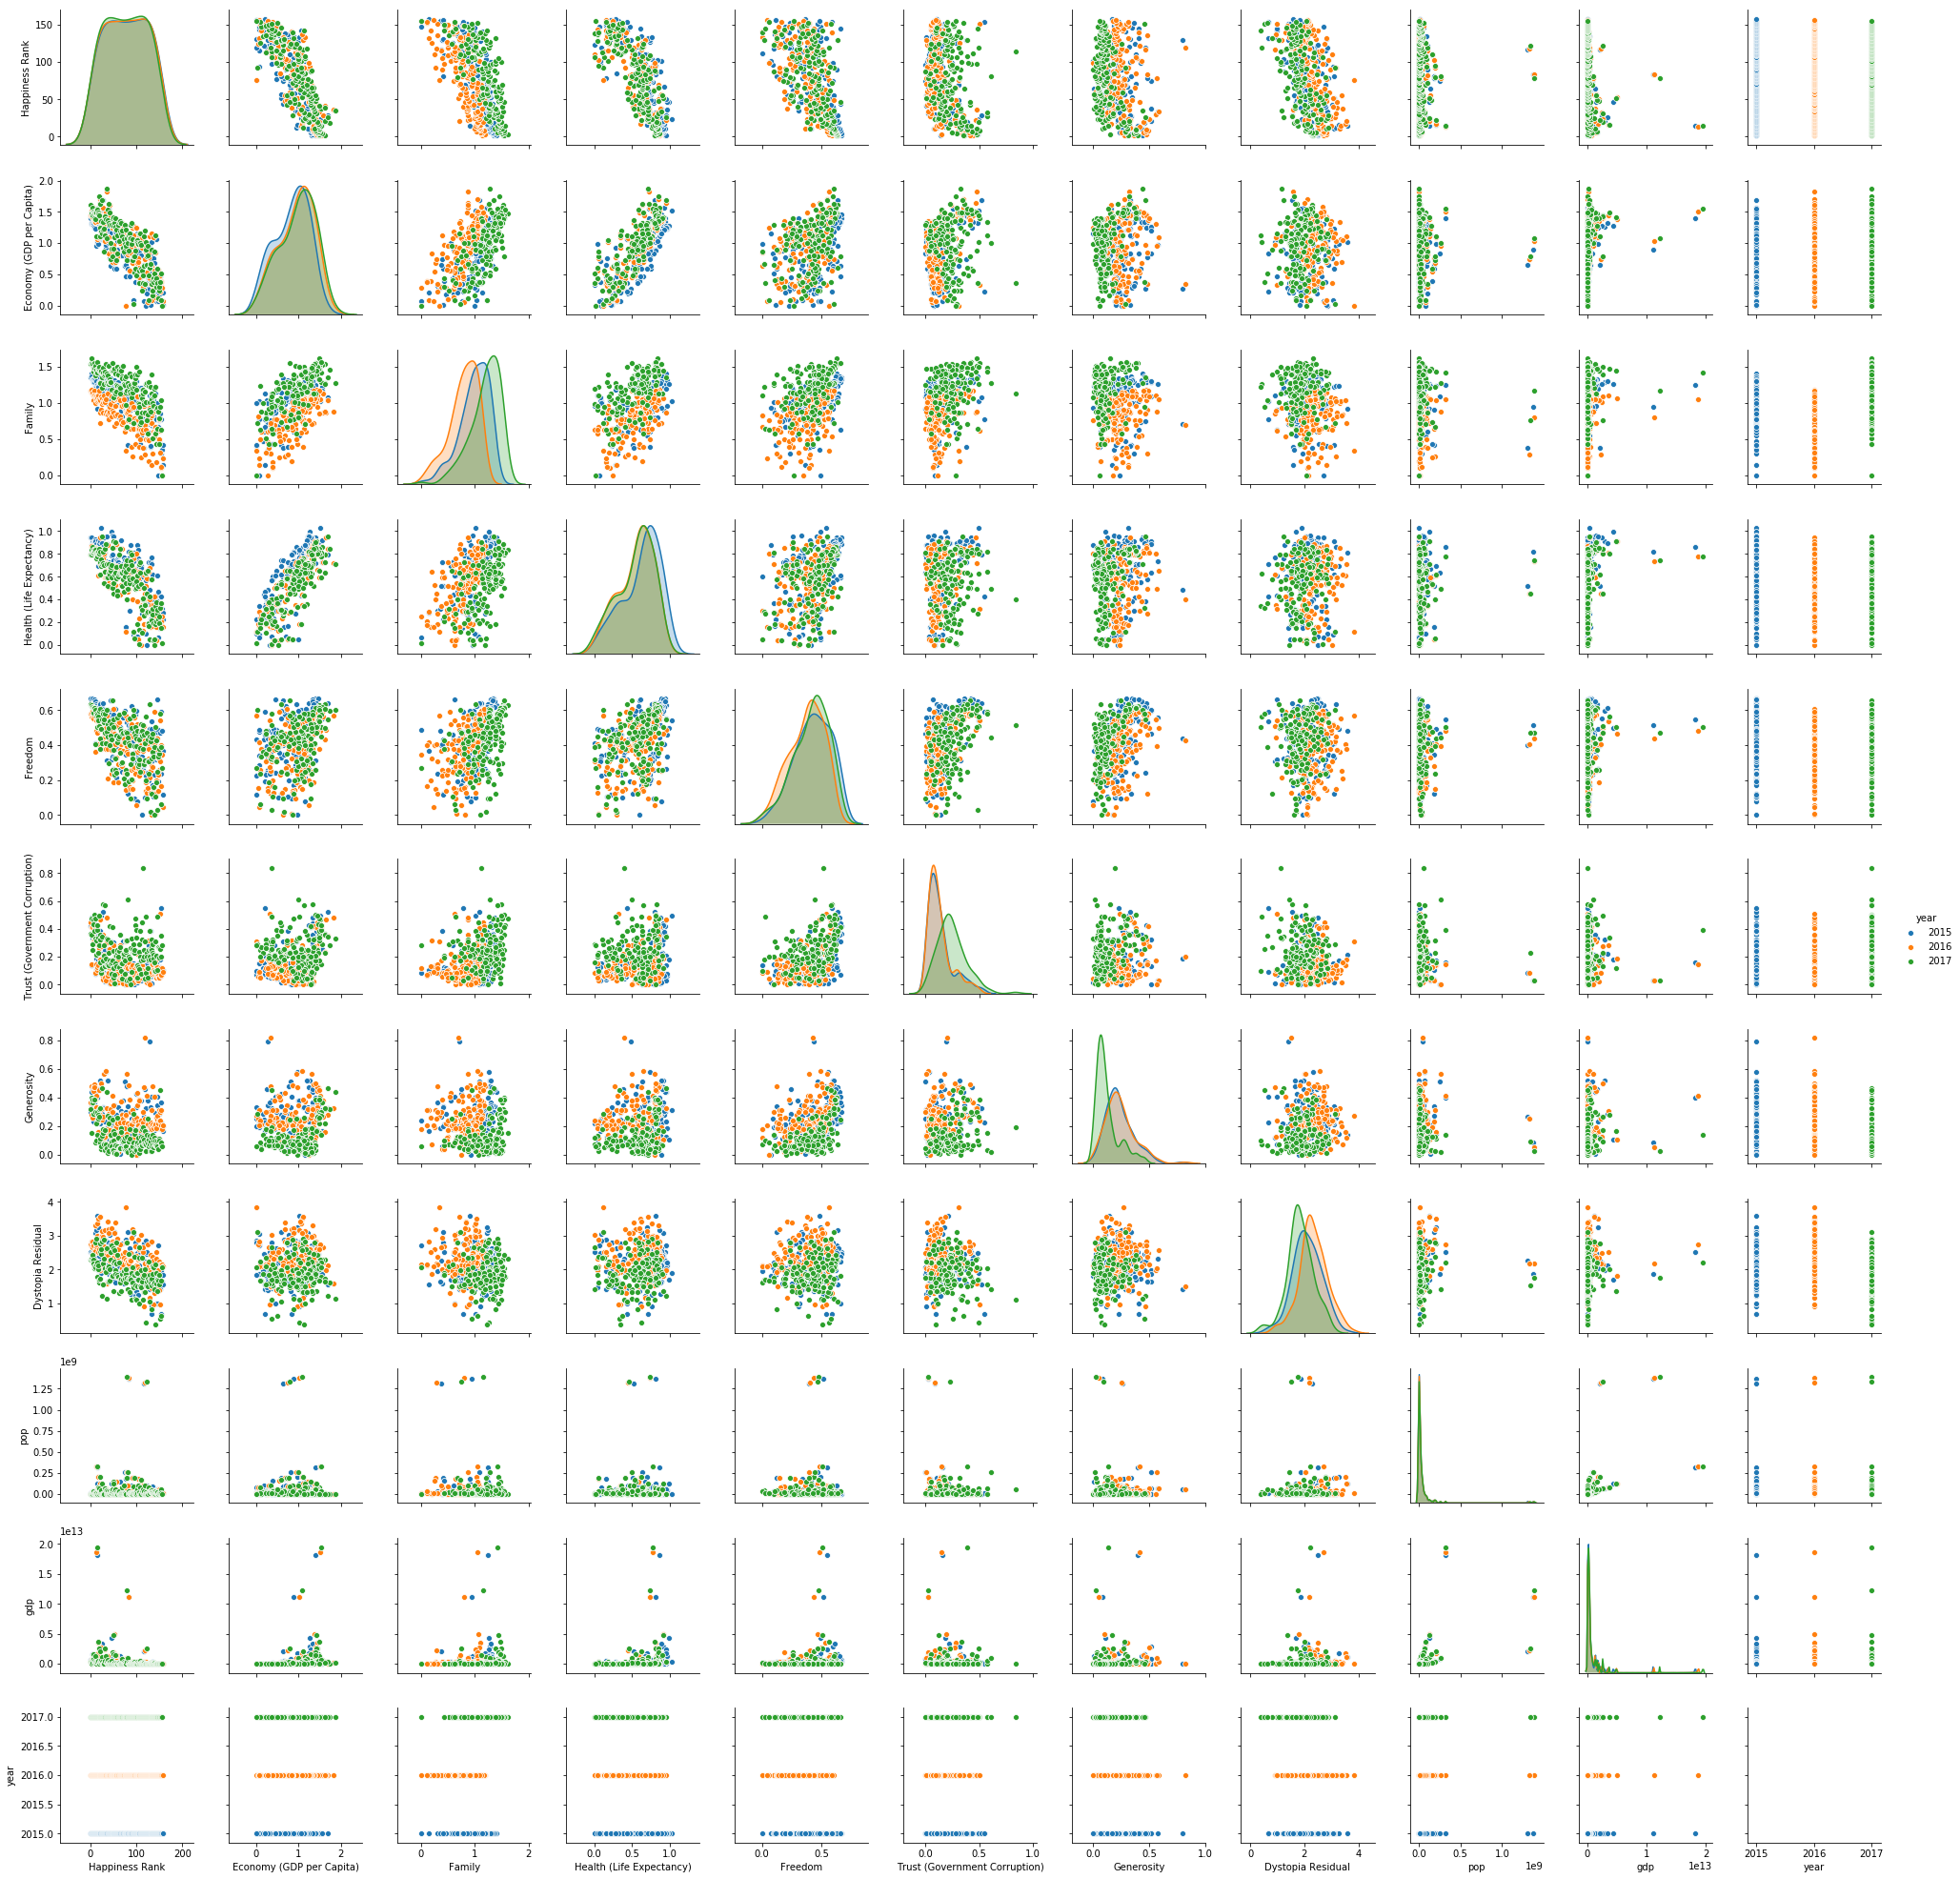

In [28]:
sns.pairplot(year_data, hue="year")

In [30]:
melt = pd.read_csv("year.csv")

In [31]:
melt.shape

(758, 13)

In [32]:
melt.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,pop,gdp,year
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8282396.0,6.800000e+11,2015.0
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,330815.0,1.734417e+10,2015.0
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5683483.0,3.030000e+11,2015.0
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5188607.0,3.870000e+11,2015.0
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,35832513.0,1.550000e+12,2015.0


In [33]:
melt.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'pop', 'gdp', 'year'],
      dtype='object')

In [34]:
melt.columns = ['Country', 'HappinessRank', 'HappinessScore',
       'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity',
       'DystopiaResidual', 'pop', 'gdp', 'year']

In [35]:
melt = pd.melt(melt, id_vars=['Country', 'HappinessRank', 'HappinessScore', 'pop', 'gdp', 'year'], 
               value_vars=['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'DystopiaResidual'])
melt.shape

(5306, 8)

In [36]:
melt.head()

,Country,HappinessRank,HappinessScore,pop,gdp,year,variable,value
0,Switzerland,1.0,7.587,8282396.0,6.800000e+11,2015.0,Economy,1.39651
1,Iceland,2.0,7.561,330815.0,1.734417e+10,2015.0,Economy,1.30232
2,Denmark,3.0,7.527,5683483.0,3.030000e+11,2015.0,Economy,1.32548
3,Norway,4.0,7.522,5188607.0,3.870000e+11,2015.0,Economy,1.45900
4,Canada,5.0,7.427,35832513.0,1.550000e+12,2015.0,Economy,1.32629


In [37]:
melt = melt.loc[melt["Country"] != "Central African Republic"]

In [38]:
melt.to_csv("melt.csv")

In [88]:
data2015 = pd.read_csv("data2015.csv")
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,pop2015,gdp2015,GDP_per_capita
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8282396,6.798320e+11,82081.56191
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,330815,1.734417e+10,52428.59576
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5683483,3.026730e+11,53254.84390
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5188607,3.866630e+11,74521.54307
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,35832513,1.552520e+12,43327.13142


In [89]:
data2019 = pd.read_csv("data2019.csv")
data2019.head()

,Country,Happiness.Rank,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.88) + residual,GDP_per_capita
0,Finland,1,7.769,7.830,7.708,1.340,1.587,0.986,0.596,0.153,0.393,2.714,54687
1,Denmark,2,7.600,7.667,7.534,1.383,1.573,0.996,0.592,0.252,0.410,2.393,66907
2,Norway,3,7.554,7.616,7.492,1.488,1.582,1.028,0.603,0.271,0.341,2.241,85204
3,Iceland,4,7.494,7.613,7.374,1.380,1.624,1.026,0.591,0.354,0.118,2.401,92922
4,Netherlands,5,7.488,7.542,7.433,1.396,1.522,0.999,0.557,0.322,0.298,2.393,58062


In [90]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'pop2015', 'gdp2015',
       'GDP_per_capita'],
      dtype='object')

In [92]:
change2015 = data2015[["Country", 'Happiness Rank', "Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'GDP_per_capita']]
change2015.columns = ["Country", '2015_Rank', "2015_Score", '2015_Economy', '2015_Family',
       '2015_Health', '2015_Freedom', '2015_Trust', '2015_Generosity', '2015_GDP']

In [93]:
data2019.columns

Index(['Country', 'Happiness.Rank', 'Happiness score', 'Whisker-high',
       'Whisker-low', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia (1.88) + residual', 'GDP_per_capita'],
      dtype='object')

In [94]:
change2019 = data2019[['Country', 'Happiness.Rank', 'Happiness score', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Perceptions of corruption', 'Explained by: Generosity', 'GDP_per_capita']]
change2019.columns = ["Country", "2019_Rank", "2019_Score", '2019_Economy', '2019_Family',
       '2019_Health', '2019_Freedom', '2019_Trust', '2019_Generosity', '2019_GDP']

In [95]:
change_df = change2015.merge(change2019, on="Country", how="left")

In [96]:
change_df

,Country,2015_Rank,2015_Score,2015_Economy,2015_Family,2015_Health,2015_Freedom,2015_Trust,2015_Generosity,2015_GDP,2019_Rank,2019_Score,2019_Economy,2019_Family,2019_Health,2019_Freedom,2019_Trust,2019_Generosity,2019_GDP
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,82081.561910,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263,90532.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,52428.595760,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354,92922.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,53254.843900,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252,66907.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,74521.543070,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271,85204.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,43327.131420,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285,51195.0
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,42494.695260,1.0,7.769,1.340,1.587,0.986,0.596,0.393,0.153,54687.0
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,45175.234860,5.0,7.488,1.396,1.522,0.999,0.557,0.298,0.322,58062.0
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,50832.589560,7.0,7.343,1.387,1.487,1.009,0.574,0.373,0.267,62548.0
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,38649.389650,8.0,7.307,1.303,1.557,1.026,0.585,0.380,0.330,49104.0
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,56643.864760,11.0,7.228,1.372,1.548,1.036,0.557,0.290,0.332,63052.0


In [134]:
change = change_df[["Country"]]

In [135]:
change["rank_change"] = change_df["2019_Rank"] - change_df["2015_Rank"]
change["score_change"] = change_df["2019_Score"] - change_df["2015_Score"]
change["Economy_change"] = change_df["2019_Economy"]/change_df["2019_Score"] - change_df["2015_Economy"]/change_df["2015_Score"]
change["Family_change"] = change_df["2019_Family"]/change_df["2019_Score"] - change_df["2015_Family"]/change_df["2015_Score"]
change["Health_change"] = change_df["2019_Health"]/change_df["2019_Score"] - change_df["2015_Health"]/change_df["2015_Score"]
change["Freedom_change"] = change_df["2019_Freedom"]/change_df["2019_Score"] - change_df["2015_Family"]/change_df["2015_Score"]
change["Trust_change"] = change_df["2019_Trust"]/change_df["2019_Score"] - change_df["2015_Trust"]/change_df["2015_Score"]
change["Generosity_change"] = change_df["2019_Generosity"]/change_df["2019_Score"] - change_df["2015_Generosity"]/change_df["2015_Score"]
change["GDP_change"] = change_df["2019_GDP"] - change_df["2015_GDP"]

/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jijiyuan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [136]:
change = change.dropna()

In [137]:
change

,Country,rank_change,score_change,Economy_change,Family_change,Health_change,Freedom_change,Trust_change,Generosity_change,GDP_change
0,Switzerland,5.0,-0.107,0.010051,0.026139,0.016557,-0.101401,-0.009473,-0.003956,8450.438090
1,Iceland,2.0,-0.067,0.011906,0.031251,0.011550,-0.106593,-0.002962,-0.010466,40493.404240
2,Denmark,-1.0,0.073,0.005877,0.026214,0.014852,-0.102865,-0.010297,-0.012197,13652.156100
3,Norway,-1.0,0.032,0.003017,0.032484,0.018404,-0.097116,-0.003387,-0.010255,10682.456930
4,Canada,4.0,-0.149,0.008975,0.028706,0.020821,-0.097840,-0.002055,-0.022523,7867.868580
5,Finland,-5.0,0.363,-0.001736,0.026274,0.006862,-0.101284,-0.005277,-0.011836,12192.304740
6,Netherlands,-2.0,0.110,0.006242,0.029747,0.012400,-0.099126,-0.003323,-0.021528,12886.765140
7,Sweden,-1.0,-0.021,0.008047,0.027456,0.013717,-0.096881,-0.008742,-0.012881,11715.410440
8,New Zealand,-1.0,0.021,0.006736,0.031959,0.015740,-0.101064,-0.006905,-0.020033,10454.610350
9,Australia,1.0,-0.056,0.006734,0.034427,0.015440,-0.102679,-0.008803,-0.013873,6408.135240


In [138]:
change.to_csv("change.csv")

(array([-100.,  -50.,    0.,   50.,  100.]),
 <a list of 5 Text yticklabel objects>)

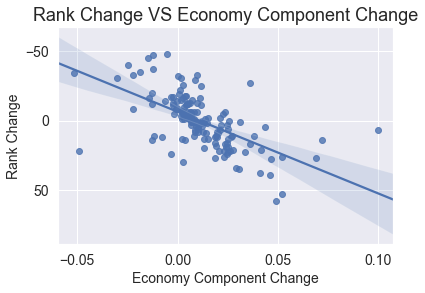

In [139]:
ax = sns.regplot(x="Economy_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Economy Component Change", fontsize=18)
plt.xlabel("Economy Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")

(array([-75., -50., -25.,   0.,  25.,  50.,  75.]),
 <a list of 7 Text yticklabel objects>)

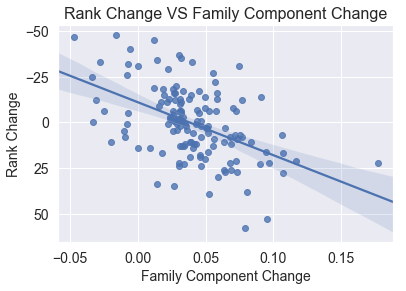

In [140]:
ax = sns.regplot(x="Family_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Family Component Change", fontsize=16)
plt.xlabel("Family Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")

(array([-100.,  -50.,    0.,   50.,  100.,  150.]),
 <a list of 6 Text yticklabel objects>)

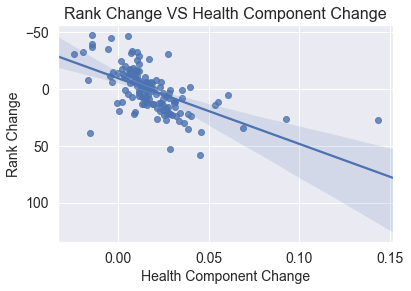

In [141]:
ax = sns.regplot(x="Health_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Health Component Change", fontsize=16)
plt.xlabel("Health Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


(array([-75., -50., -25.,   0.,  25.,  50.,  75.]),
 <a list of 7 Text yticklabel objects>)

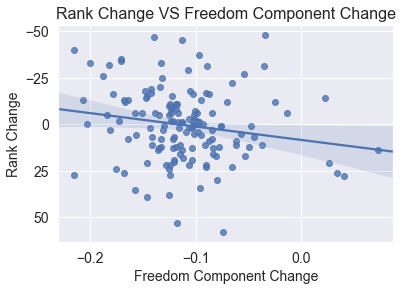

In [142]:
ax = sns.regplot(x="Freedom_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Freedom Component Change", fontsize=16)
plt.xlabel("Freedom Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")

(array([-75., -50., -25.,   0.,  25.,  50.,  75.]),
 <a list of 7 Text yticklabel objects>)

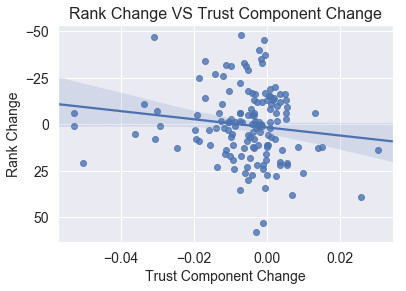

In [143]:
ax = sns.regplot(x="Trust_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Trust Component Change", fontsize=16)
plt.xlabel("Trust Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")

(array([-75., -50., -25.,   0.,  25.,  50.,  75.]),
 <a list of 7 Text yticklabel objects>)

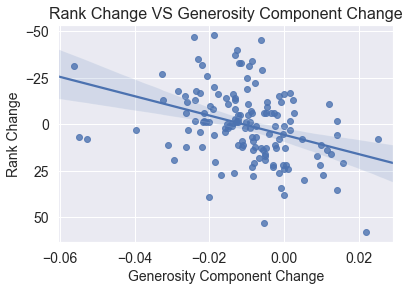

In [144]:
ax = sns.regplot(x="Generosity_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS Generosity Component Change", fontsize=16)
plt.xlabel("Generosity Component Change", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")

(array([-75., -50., -25.,   0.,  25.,  50.,  75.]),
 <a list of 7 Text yticklabel objects>)

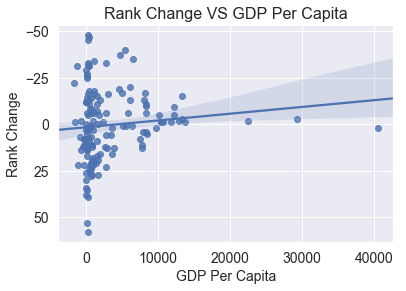

In [146]:
ax = sns.regplot(x="GDP_change", y="rank_change", data=change,
                fit_reg=True,scatter=True)
ax.invert_yaxis()
plt.title("Rank Change VS GDP Per Capita", fontsize=16)
plt.xlabel("GDP Per Capita", fontsize=14)
plt.ylabel("Rank Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("boxplot.png")